**Import library**

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
# Load model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

**Process image and load**

In [6]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [34]:
content_image = load_image('myself.jpg')
style_image = load_image('styleImg.jpg')

**Visualize output**

In [35]:
content_image.shape

TensorShape([1, 2048, 1473, 3])

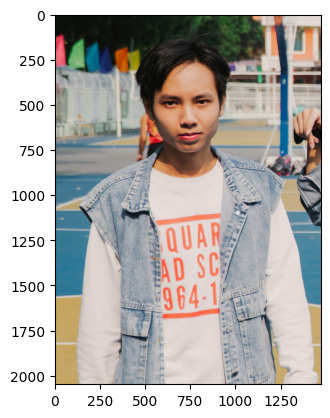

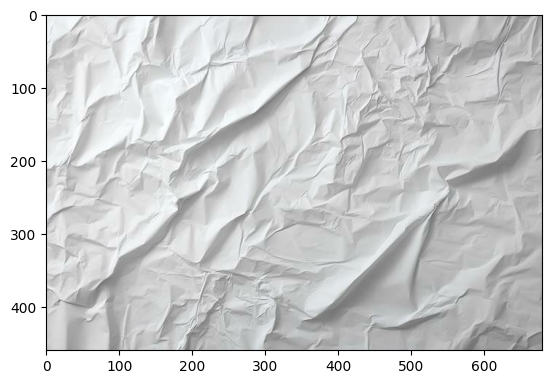

In [36]:
plt.imshow(np.squeeze(content_image))
plt.show()

plt.imshow(np.squeeze(style_image))
plt.show()

**Stylize image**

In [37]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

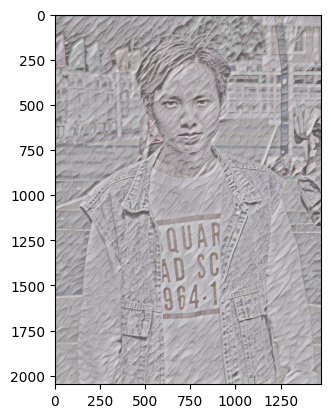

In [38]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

**Export the image**

In [39]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True